In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from utils import *

In [26]:
features = pd.read_csv('../data/almost_data.csv')
target = pd.read_csv('../data/Target.csv')

features['Date et heure de comptage'] = pd.to_datetime(features['Date et heure de comptage'],
                                                       utc=True)
features['Date et heure de comptage'] = features['Date et heure de comptage'].dt.tz_localize(None)

features.drop('Unnamed: 0', axis=1, inplace=True)
target.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

data = pd.concat([features, target], axis=1)
data['datetime'] = data['Date et heure de comptage']
data.set_index('Date et heure de comptage', inplace=True)
print(len(data))
data.dropna(subset=['Débit horaire', 'Taux d\'occupation'], inplace=True)
print(len(data))
start = min(data['datetime'])
print(start)
data['index'] = (
    data['datetime']
    .copy()
    .apply(lambda x: int(pd.Timedelta(x - start).total_seconds() / 3600))
)

data_train, data_test = train_test_split(data,
                                         test_size=.2, shuffle=False, random_state=1)

data_train, data_val = train_test_split(data_train,
                                        test_size=.2, shuffle=False, random_state=1)

29228
26028
2021-12-01 03:00:00


In [27]:
data_train.tail(10)

,Vacance,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Humidité,Visibilité horizontale,Meteo pres,Meteo pass,Libelle_AV_Champs_Elysees,...,Etat trafic_Fluide,Etat trafic_Inconnu,Etat trafic_Pré-saturé,Etat trafic_Saturé,Etat arc_Barré,Etat arc_Invalide,Débit horaire,Taux d'occupation,datetime,index
Date et heure de comptage,,,,,,,,,,,,,,,,,,,,,
2022-08-16 22:00:00,0,120,210,0,290,96,8870,0,0,1,...,1,0,0,0,0,1,651.0,14.64278,2022-08-16 22:00:00,6211
2022-08-16 23:00:00,0,120,210,0,290,96,8870,0,0,0,...,1,0,0,0,0,1,160.0,2.12056,2022-08-16 23:00:00,6212
2022-08-16 23:00:00,0,120,210,0,290,96,8870,0,0,1,...,1,0,0,0,0,1,515.0,8.47611,2022-08-16 23:00:00,6212
2022-08-16 23:00:00,0,120,210,0,290,96,8870,0,0,0,...,1,0,0,0,0,1,187.0,1.10500,2022-08-16 23:00:00,6212
2022-08-17 00:00:00,0,-40,0,0,291,97,8780,0,0,0,...,1,0,0,0,0,1,106.0,1.20889,2022-08-17 00:00:00,6213
2022-08-17 00:00:00,0,-40,0,0,291,97,8780,0,0,1,...,1,0,0,0,0,1,413.0,5.47722,2022-08-17 00:00:00,6213
2022-08-17 00:00:00,0,-40,0,0,291,97,8780,0,0,0,...,1,0,0,0,0,1,116.0,0.64500,2022-08-17 00:00:00,6213
2022-08-17 01:00:00,0,-40,0,0,291,97,8780,0,0,0,...,1,0,0,0,0,1,62.0,0.81944,2022-08-17 01:00:00,6214
2022-08-17 01:00:00,0,-40,0,0,291,97,8780,0,0,0,...,1,0,0,0,0,1,66.0,0.31833,2022-08-17 01:00:00,6214


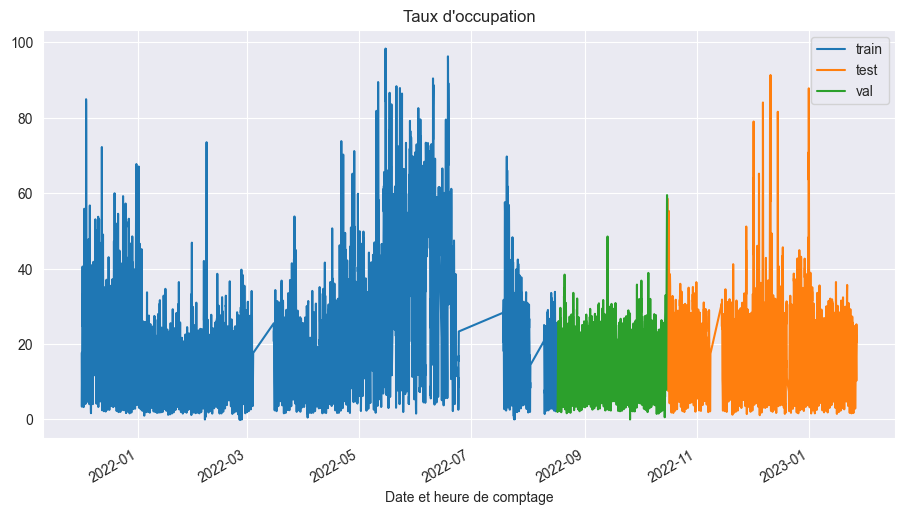

In [28]:
def time_series_graph(data_train, data_test, data_val, target='Taux d\'occupation',
                      street='Libelle_AV_Champs_Elysees'):
    fig, ax = plt.subplots(figsize=(11, 6))
    data_train[data_train[street] == 1][target].plot(ax=ax, label='train')
    data_test[data_test[street] == 1][target].plot(ax=ax, label='test')
    data_val[data_val[street] == 1][target].plot(ax=ax, label='val')
    ax.set_title(target)
    ax.legend()
    plt.show()


time_series_graph(data_train, data_test, data_val)

In [29]:
data_train.head(10)
features_ = list(data_train.columns)
features_.remove('Débit horaire')
features_.remove('Taux d\'occupation')
features_

['Vacance',
 'Variation de pression en 3 heures',
 'Direction du vent moyen 10 mn',
 'Vitesse du vent moyen 10 mn',
 'Température',
 'Humidité',
 'Visibilité horizontale',
 'Meteo pres',
 'Meteo pass',
 'Libelle_AV_Champs_Elysees',
 'Libelle_Convention',
 'Libelle_Sts_Peres',
 'Etat trafic_Bloqué',
 'Etat trafic_Fluide',
 'Etat trafic_Inconnu',
 'Etat trafic_Pré-saturé',
 'Etat trafic_Saturé',
 'Etat arc_Barré',
 'Etat arc_Invalide',
 'datetime',
 'index']

## Taux d'occupation -- Champs Elysees

<AxesSubplot: xlabel='datetime', ylabel="Taux d'occupation">

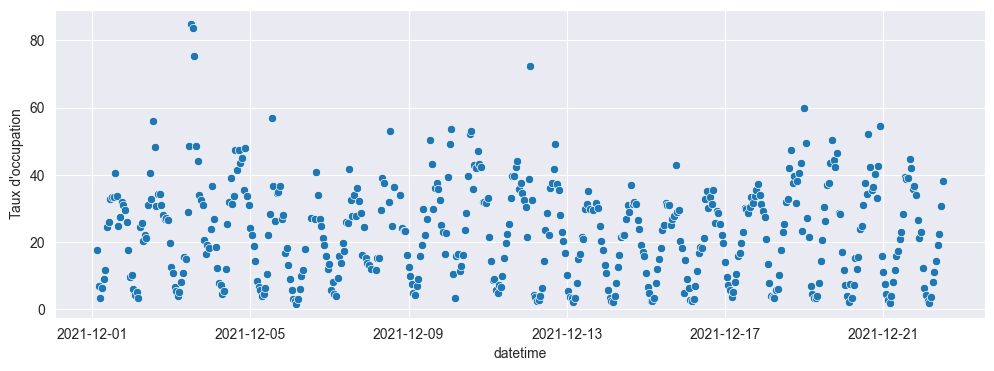

In [30]:
df = data_train[data_train['Libelle_AV_Champs_Elysees'] == 1].copy()
target = 'Taux d\'occupation'

fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(data=df.iloc[:500, :], x='datetime', y=target,
                ax=ax)

There is a clear seasonality in data (daily)

<AxesSubplot: xlabel='index', ylabel="Taux d'occupation">

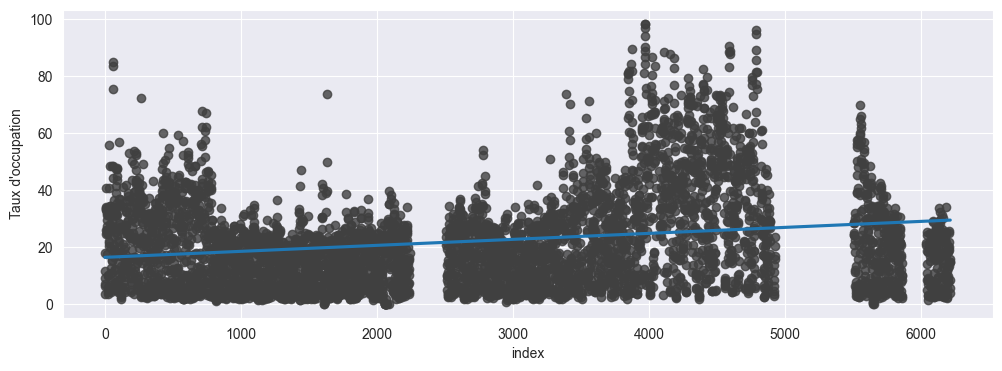

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.regplot(data=df, x='index', y=target,
            ax=ax, ci=None, scatter_kws=dict(color='0.25'))

<AxesSubplot: xlabel='index', ylabel="Taux d'occupation">

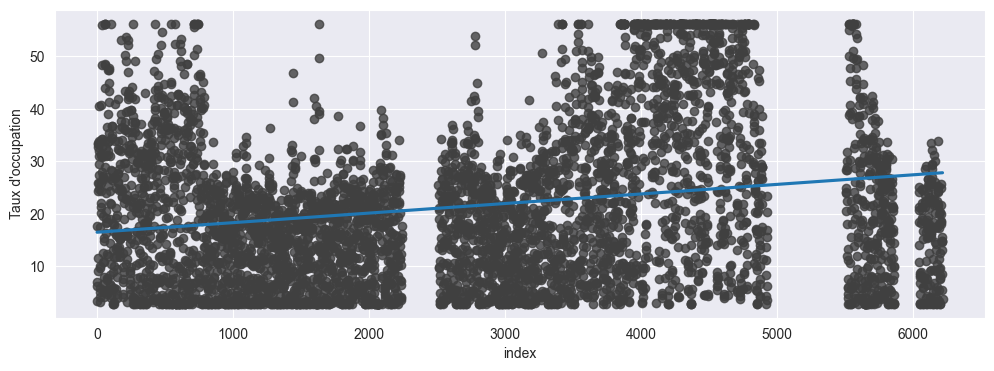

In [32]:
y = df[target]
q_5 = y.quantile(0.05)
q_95 = y.quantile(0.95)
y_clean = y.copy()
y_clean[y_clean > q_95] = q_95
y_clean[y_clean < q_5] = q_5

fig, ax = plt.subplots(figsize=(12, 4))
sns.regplot(data=df, x='index', y=y_clean,
            ax=ax, ci=None, scatter_kws=dict(color='0.25'))

Even if we remove the outliers, there is a global upward trend

In [33]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['index']]

model_trend = LinearRegression()
model_trend.fit(X, y_clean)
y_trend = pd.Series(model_trend.predict(X), index=df.index)
y_det = y - y_trend

<AxesSubplot: xlabel='index'>

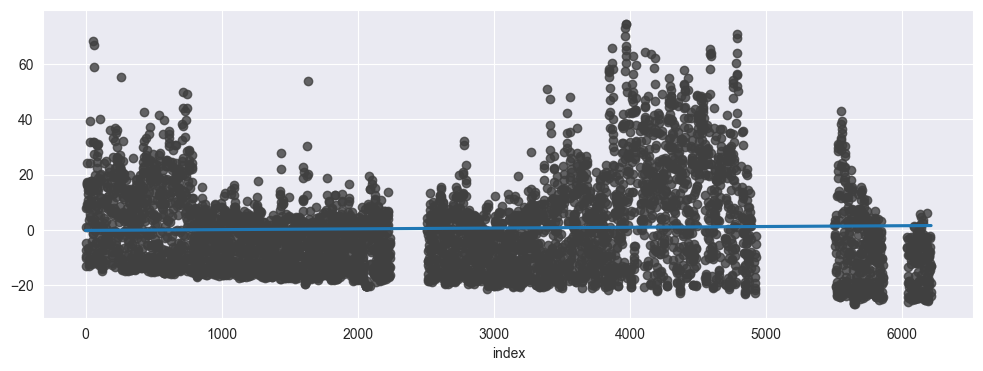

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.regplot(data=df, x='index', y=y_det,
            ax=ax, ci=None, scatter_kws=dict(color='0.25'))

<AxesSubplot: xlabel='index'>

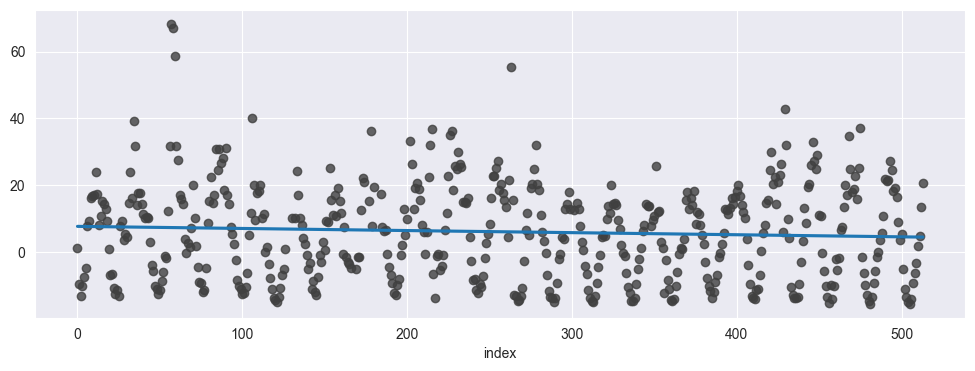

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.regplot(x=df['index'][:500], y=y_det[:500],
            ax=ax, ci=None, scatter_kws=dict(color='0.25'))

/var/folders/g9/qd_50t6125vb7v8pbdy0x1rh0000gn/T/ipykernel_18294/3016689885.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  X["week"] = df['datetime'].dt.week
/Users/pavelkurach/PycharmProjects/bcg-datathon-2023/playground/utils.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/Users/pavelkurach/PycharmProjects/bcg-datathon-2023/playground/utils.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/Users/pavelkurach/PycharmProjects/bcg-datathon-2023/playground/utils.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


<AxesSubplot: title={'center': 'Seasonal Plot (month/day)'}, xlabel='day'>

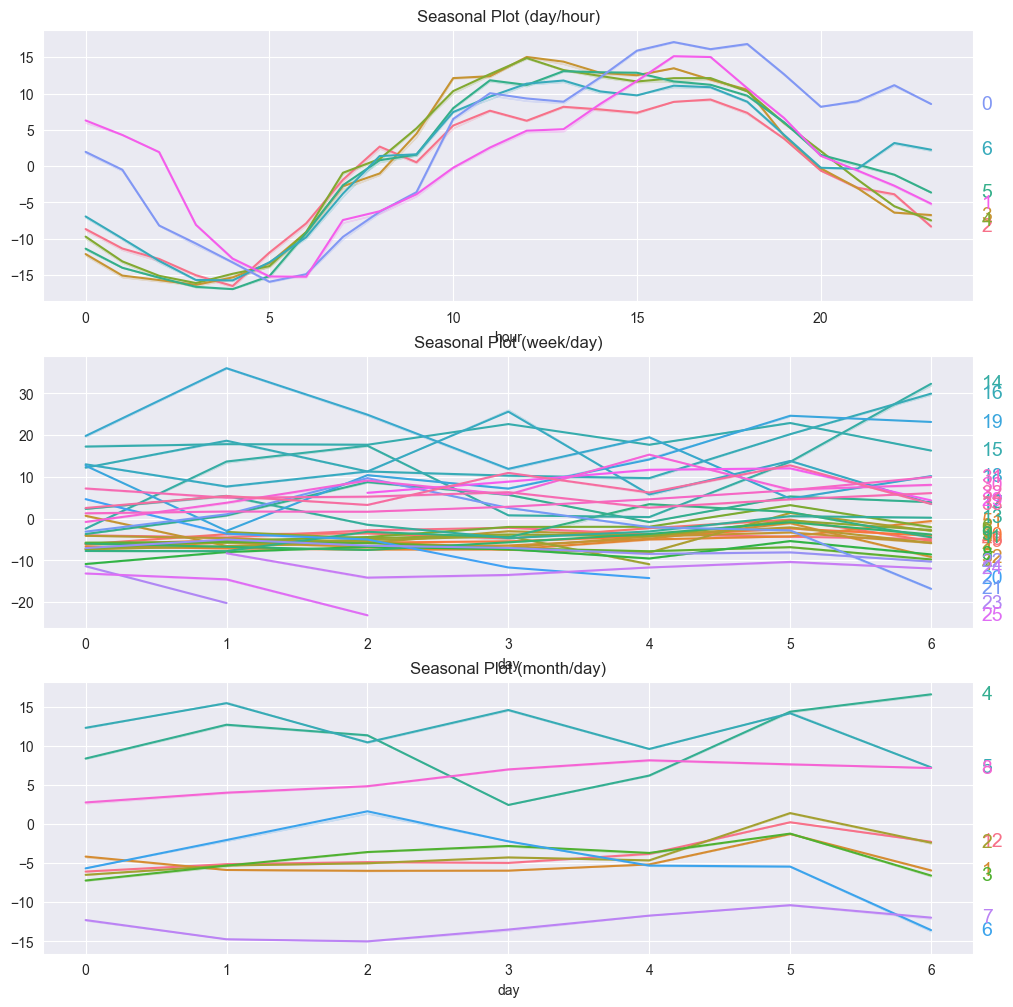

In [36]:
X = df.loc[:, ['datetime']]
X["hour"] = df['datetime'].dt.hour
X["day"] = df['datetime'].dt.dayofweek
X["week"] = df['datetime'].dt.week
X["month"] = df['datetime'].dt.month
X["year"] = df['datetime'].dt.year

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(12, 12))
seasonal_plot(X, y=y_det, period="day", freq="hour", ax=ax0)
seasonal_plot(X, y=y_det, period="week", freq="day", ax=ax1)
seasonal_plot(X, y=y_det, period="month", freq="day", ax=ax2)

In [37]:
from statsmodels.tsa.deterministic import CalendarFourier

fourier = CalendarFourier(freq='D', order=4)
X_f = fourier.in_sample(pd.DatetimeIndex(df['datetime']))
model_seasonal = LinearRegression().fit(X_f, y_det)
y_seasonal = pd.Series(model_seasonal.predict(X_f), index=df.index)

/Users/pavelkurach/PycharmProjects/bcg-datathon-2023/playground/utils.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


<AxesSubplot: title={'center': 'Seasonal Plot (day/hour)'}, xlabel='hour'>

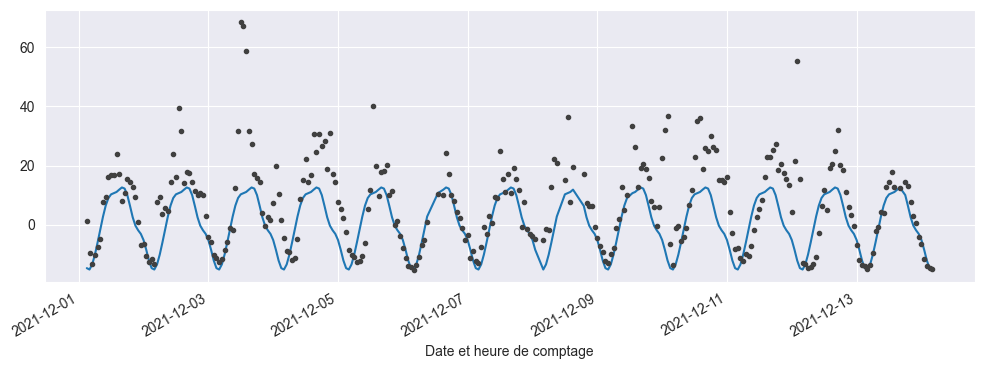

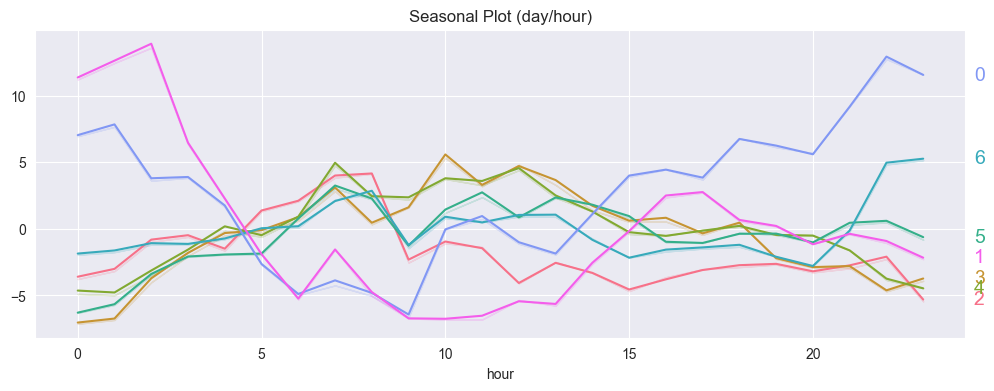

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[:300], y=y_seasonal[:300],
             ax=ax, )
ax = y_det[:300].plot(color='0.25', style='.')

y_desnl = y_det - y_seasonal

fig, ax = plt.subplots(figsize=(12, 4))
seasonal_plot(X, y=y_desnl, period="day", freq="hour", ax=ax)

In [39]:
from scipy.optimize import curve_fit


def sin_func(t, C, A, phi):
    return C + A * np.sin(2 * np.pi * t / 24 + phi)


popt, _ = curve_fit(sin_func, df['index'], y_det)
y_seasonal = sin_func(df['index'], *popt)

/Users/pavelkurach/PycharmProjects/bcg-datathon-2023/playground/utils.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


<AxesSubplot: title={'center': 'Seasonal Plot (day/hour)'}, xlabel='hour'>

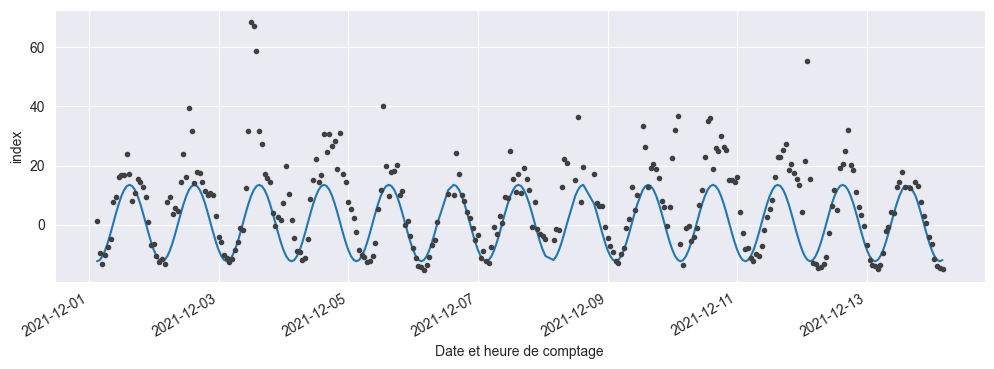

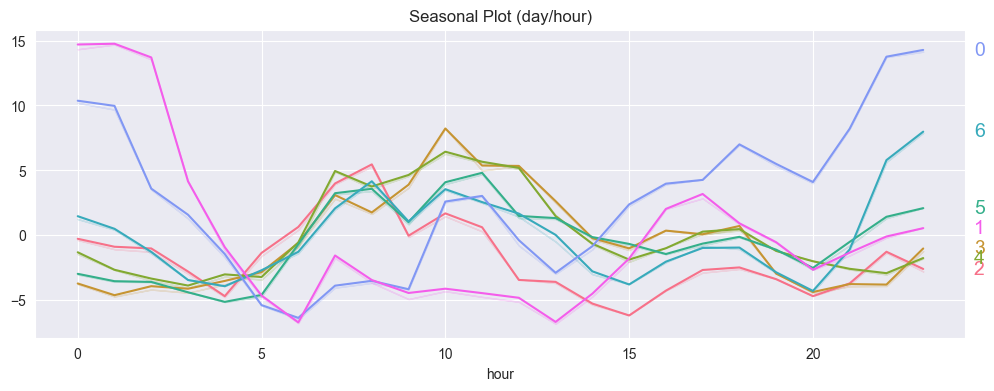

In [40]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[:300], y=y_seasonal[:300],
             ax=ax, )
ax = y_det[:300].plot(color='0.25', style='.')

y_desnl = y_det - y_seasonal

fig, ax = plt.subplots(figsize=(12, 4))
seasonal_plot(X, y=y_desnl, period="day", freq="hour", ax=ax)

<AxesSubplot: xlabel='Date et heure de comptage'>

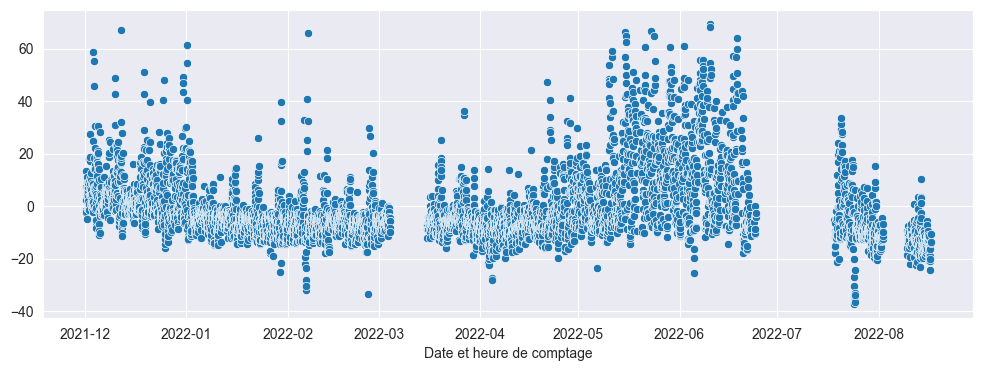

In [41]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=y_desnl.index, y=y_desnl, ax=ax)

/Users/pavelkurach/PycharmProjects/bcg-datathon-2023/venv/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


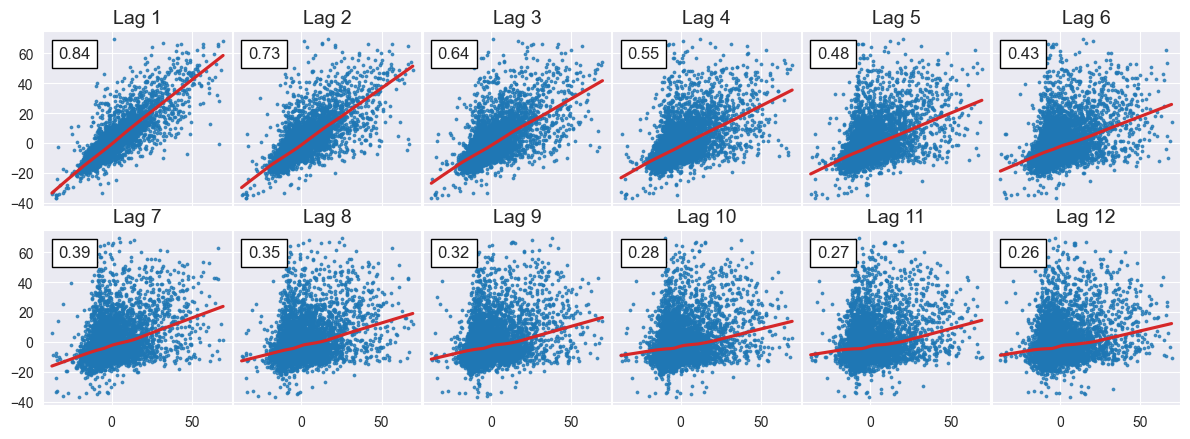

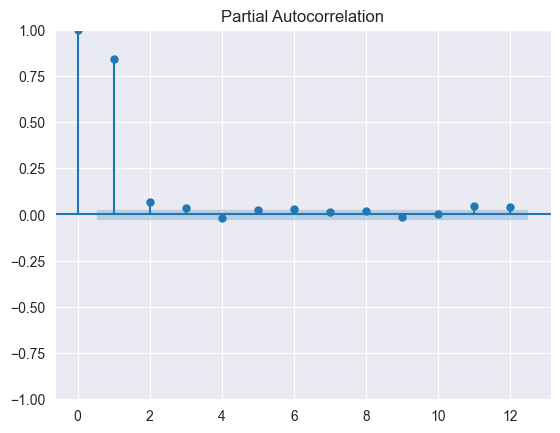

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_lags(y_desnl, lags=12, nrows=2)
_ = plot_pacf(y_desnl, lags=12)

In [43]:
lags = make_lags(y_desnl, lags=3)
lags

,y_lag_1,y_lag_2,y_lag_3
Date et heure de comptage,,,
2021-12-01 03:00:00,NaN,NaN,NaN
2021-12-01 04:00:00,13.412751,NaN,NaN
2021-12-01 05:00:00,2.322845,13.412751,NaN
2021-12-01 06:00:00,-2.541381,2.322845,13.412751
2021-12-01 07:00:00,-1.710803,-2.541381,2.322845
...,...,...,...
2022-08-16 21:00:00,-16.245868,-20.233243,-24.428081
2022-08-16 22:00:00,-13.726108,-16.245868,-20.233243
2022-08-16 23:00:00,-10.569940,-13.726108,-16.245868


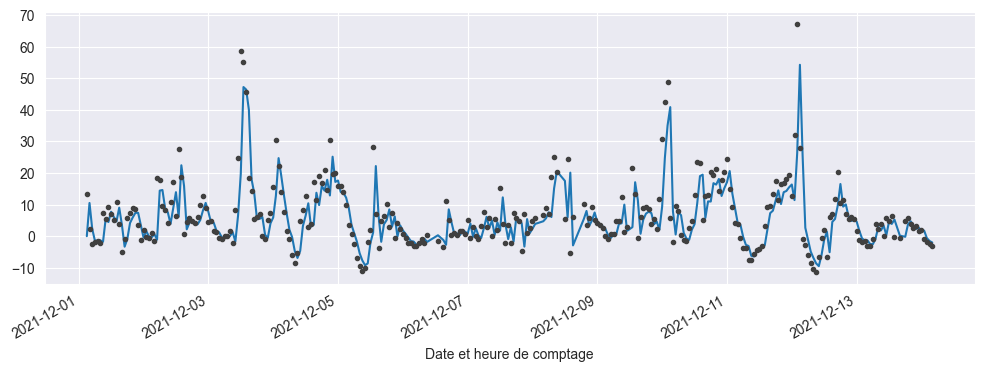

In [44]:
X = lags.loc[:, [f'y_lag_{i}' for i in range(1, 4)]].copy().fillna(lags['y_lag_1'].mean())

model_cycle = LinearRegression()
model_cycle.fit(X, y_desnl)
y_cycle = pd.Series(model_cycle.predict(X), index=df.index)

fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[:300], y=y_cycle[:300],
             ax=ax)
ax = y_desnl[:300].plot(color='0.25', style='.')

5.899915730063906e-16

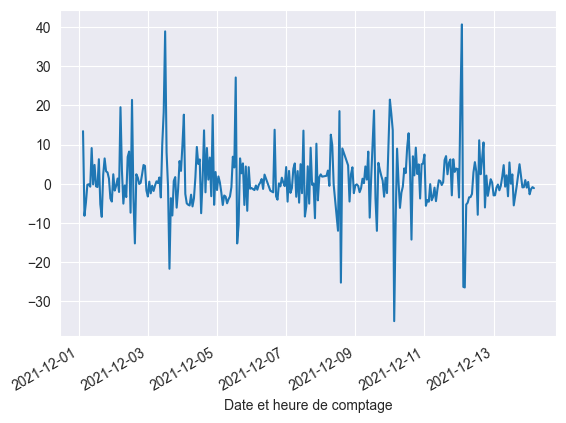

In [45]:
y_res = y_desnl - y_cycle
y_res[:300].plot()
y_res.mean()

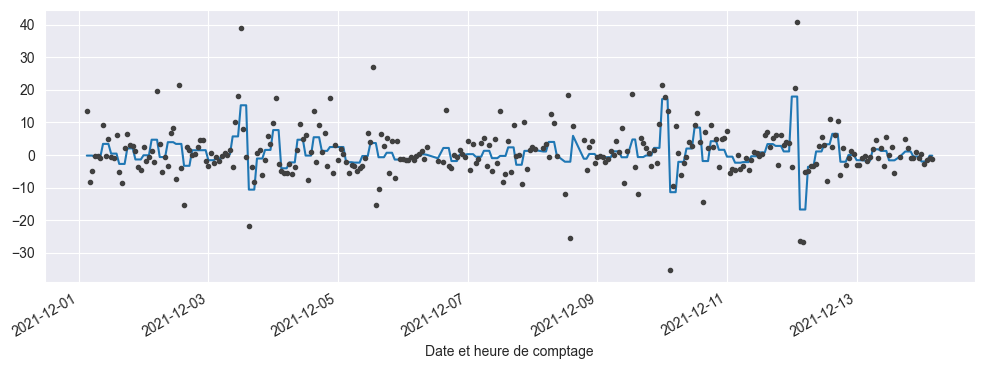

In [46]:
from xgboost import XGBRegressor

features = [
    'Vacance',
    'Variation de pression en 3 heures',
    'Direction du vent moyen 10 mn',
    'Vitesse du vent moyen 10 mn',
    'Température',
    'Humidité',
    'Visibilité horizontale',
    'Meteo pres',
    'Meteo pass',
]

X = df.loc[:, features]
model_res = XGBRegressor()
model_res.fit(X, y_res)
y_ext = pd.Series(model_res.predict(X), index=df.index)

fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[:300], y=y_ext[:300],
             ax=ax)
ax = y_res[:300].plot(color='0.25', style='.')

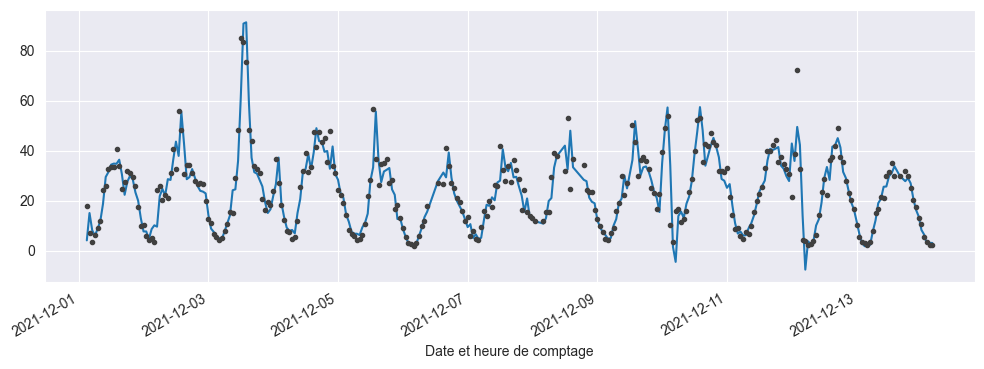

In [47]:
y_pred = y_trend + y_seasonal + y_cycle + y_ext

fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[:300], y=y_pred[:300],
             ax=ax)
ax = y[:300].plot(color='0.25', style='.')

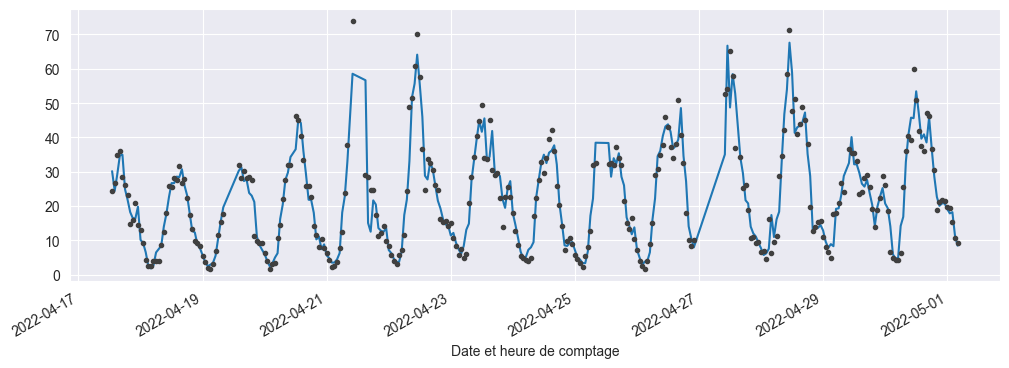

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[3000:3300], y=y_pred[3000:3300],
             ax=ax)
ax = y[3000:3300].plot(color='0.25', style='.')

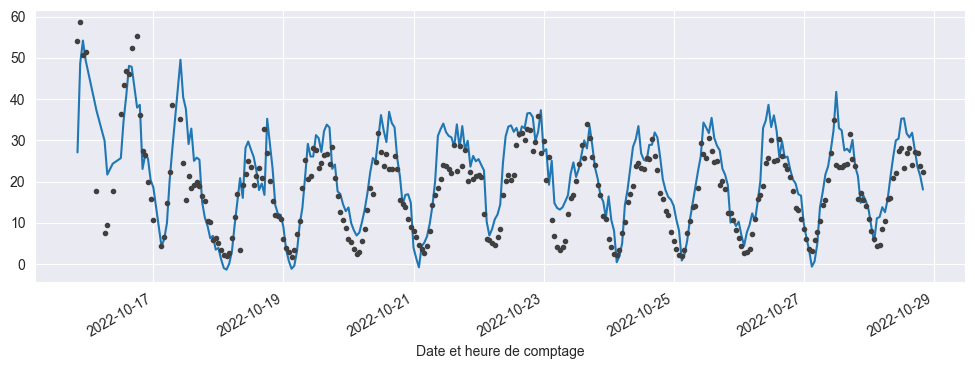

In [55]:
df = data_test[data_test['Libelle_AV_Champs_Elysees'] == 1].copy()
y = df[target]

X = df.loc[:, ['index']]

y_trend = pd.Series(model_trend.predict(X), index=df.index)
y_det = y - y_trend

X_f = fourier.in_sample(pd.DatetimeIndex(df['datetime']))
y_seasonal = pd.Series(model_seasonal.predict(X_f), index=df.index)
y_desnl = y_det - y_seasonal

lags = make_lags(y_desnl, lags=3)

X = lags.loc[:, [f'y_lag_{i}' for i in range(1, 4)]].copy().fillna(lags['y_lag_1'].mean())

y_cycle = pd.Series(model_cycle.predict(X), index=df.index)

X = df.loc[:, features]
y_ext = pd.Series(model_res.predict(X), index=df.index)

y_pred = y_trend + y_seasonal + y_cycle + y_ext

fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=y.index[:300], y=y_pred[:300],
             ax=ax)
ax = y[:300].plot(color='0.25', style='.')

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred, squared=False)

6.108768159026993